### Importing the main toolkits

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import nltk
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

## 1- Reading the Dataset 

In [3]:
temp = pd.read_csv('input/1429_1.csv')

/tmp/ipykernel_15839/3316960737.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv('input/1429_1.csv')


In [4]:
temp.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
# create a new dataframe consist of only text and rating
df = pd.DataFrame()
df[['text', 'rating']] = temp[['reviews.text', 'reviews.rating']]
df.head()

,text,rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [7]:
# Investigate how many rows of have a Null values
df.isnull().sum()

text       1
rating    33
dtype: int64

In [8]:
# drop the rows with Null values 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    34626 non-null  object 
 1   rating  34626 non-null  float64
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


In [9]:
# set label as 1 if rating is greater than or equal to 4 else set it as 0
df['label'] = df['rating'].apply(lambda x : 1 if x >= 4 else 0)
print(df['label'].value_counts())


1    32315
0     2311
Name: label, dtype: int64


/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


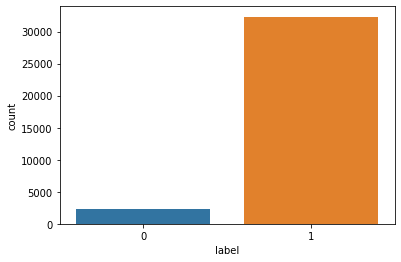

In [10]:
import seaborn as sns
from sklearn.utils import resample

sns.countplot(df['label'])
#create two different dataframe of majority and minority class
df_majority = df[(df['label'] == 1)]
df_minority = df[(df['label'] == 0)]


0    32315
1    32315
Name: label, dtype: int64


/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

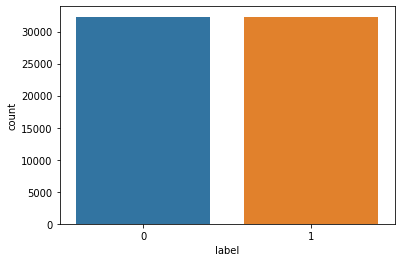

In [11]:
# upsample minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,  # sample with replacement
    n_samples=32315,  # to match majority class
    random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df = df_upsampled
print(df['label'].value_counts())

sns.countplot(df['label'])

In [12]:
# drop the unneeded column of ratings
# axis=1 means that the function is applied row-wise on the DataFrame
# i.e remove rows
df.drop(labels=['rating'], axis=1, inplace=True)

df.head()

,text,label
10653,The tablet is nice but the internet source tak...,0
15187,I was not a fan of the Amazon type operating s...,0
13445,My kids like down games and play with. It is f...,0
13108,This is a competent tablet at a bargain price....,0
21686,This tablet conked out on me the first day I p...,0


# 2- Text Preprocessing

In [13]:
def remove_pattern(text, pattern):
    """
    Docstring: 
    
    remove any pattern from the input text.
    
    Parameters
    ----------
    text: string input, the text to clean.
    pattern : string input, the pattern to remove from the text input.
    
    Returns
    -------
    a cleaned string.
    
    """
    
    # find all the pattern in the input text and return a list of postion indeces 
    r = re.findall(pattern, text)
    
    # replace the pattern with an empty space
    for i in r: text = re.sub(pattern, '', text)
    
    return text

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# lower case every word to ease the upcoming processes
df['text'] = df['text'].str.lower()

# tokenize the text to search for any stop words to remove it
df['tokenized_text'] = df.text.apply(lambda x : x.split())
# print(df['tokenized_text'].head())
# creating a set of stopwords(if you wonder why set cuz it is faster than a list)
stopWords = set(nltk.corpus.stopwords.words('english'))
df['tokenized_text'] = df['tokenized_text'].apply(lambda x : [word for word in x if not word in stopWords])

# print(df['tokenized_text'].head())
# create a word net lemma
lemma = nltk.stem.WordNetLemmatizer()
pos = nltk.corpus.wordnet.VERB
df['tokenized_text'] = df['tokenized_text'].apply(lambda x : [lemma.lemmatize(word, pos) for word in x])

# remove any punctuation
df['tokenized_text'] = df['tokenized_text'].apply(lambda x : [ remove_pattern(word,'\.') for word in x])

# rejoin the text again to get a cleaned text
df['cleaned_text'] = df['tokenized_text'].apply(lambda x : ' '.join(x))

df.drop(labels=['tokenized_text'], axis=1, inplace=True)

df.head()

[nltk_data] Downloading package stopwords to /home/ggdv05/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ggdv05/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ggdv05/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,label,cleaned_text
10653,the tablet is nice but the internet source tak...,0,tablet nice internet source take forever load ...
15187,i was not a fan of the amazon type operating s...,0,fan amazon type operate system tablet end take...
13445,my kids like down games and play with. it is f...,0,kid like game play with young children don’t w...
13108,this is a competent tablet at a bargain price....,0,competent tablet bargain price unfortunately c...
21686,this tablet conked out on me the first day i p...,0,tablet conk first day power on amazon symbol c...


## 3- Features Extraction 

### i- Bag of Words Method

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


# perform vectorization on our cleaned text 
bow_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english', max_features=1000)
 
bow_features = bow_vectorizer.fit_transform(df['cleaned_text'])

bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names())

bow_df.head()

/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,11,15,16,1st,20,200,2015,2nd,...,worth,write,wrong,year,years,yes,young,younger,youtube,yr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ii- TF-IDF Method

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_Vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')

tfidf_features = tfidf_Vectorizer.fit_transform(df['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_Vectorizer.get_feature_names())

tfidf_df.head()

/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,11,15,16,1st,20,200,2015,2nd,...,worth,write,wrong,year,years,yes,young,younger,youtube,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.434859,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## 4- Dataset Split

In [17]:
from sklearn.model_selection import train_test_split

X_train_bow, X_metric_bow, y_train_bow, y_metric_bow = train_test_split(bow_df, df['label'], test_size=0.2, random_state=42)
X_test_bow, X_valid_bow, y_test_bow, y_valid_bow = train_test_split(X_metric_bow, y_metric_bow, test_size=0.5, random_state=42)


X_train_tfidf, X_metric_tfidf, y_train_tfidf, y_metric_tfidf = train_test_split(tfidf_df, df['label'], test_size=0.2, random_state=42)
X_test_tfidf, X_valid_tfidf, y_test_tfidf, y_valid_tfidf = train_test_split(X_metric_tfidf, y_metric_tfidf, test_size=0.5, random_state=42)

## 5- Building a Machine Learning Model 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from colorama import Fore, Style
from sklearn.metrics import accuracy_score

bow = []
tfidf = []
k = []
for i in range(1,15):
  nbrs = i
  clf_bow_knn = clf_tfidf_knn = KNeighborsClassifier(n_neighbors=nbrs)
  clf_bow_knn.fit(X_train_bow, y_train_bow)
  clf_tfidf_knn.fit(X_train_tfidf, y_train_tfidf)
  pred_bow_knn   = clf_bow_knn.predict(X_test_bow)
  pred_tfidf_knn = clf_tfidf_knn.predict(X_test_tfidf)
  print(nbrs)
  b = 100 * accuracy_score(y_test_bow, pred_bow_knn)
  t = 100 * accuracy_score(y_test_tfidf, pred_tfidf_knn)
  print(f'BOW: {(100 * accuracy_score(y_test_bow, pred_bow_knn))}')
  print(f'TF-IDF: {(100 * accuracy_score(y_test_tfidf, pred_tfidf_knn))}')
  bow.append(b)
  tfidf.append(t)
  k.append(nbrs)


1
BOW: 97.67909639486307
TF-IDF: 98.34442209500233
2
BOW: 95.74501005724896
TF-IDF: 97.18397029243386
3
BOW: 95.74501005724896
TF-IDF: 97.18397029243386
4
BOW: 93.91923255454124
TF-IDF: 85.33188921553459
5
BOW: 93.9965960080458
TF-IDF: 89.50951570478107
6
BOW: 92.29460003094539
TF-IDF: 84.66656351539534
7
BOW: 92.31007272164629
TF-IDF: 88.67399040693176
8
BOW: 90.94847593996596
TF-IDF: 84.07860126876064
9
BOW: 90.8865851771623
TF-IDF: 88.03961008819434
10
BOW: 89.7880241373975
TF-IDF: 84.43447315488163
11
BOW: 89.30837072566919
TF-IDF: 87.55995667646603
12
BOW: 88.08602816029708
TF-IDF: 83.9084016710506
13
BOW: 87.55995667646603
TF-IDF: 86.97199442983134
14
BOW: 86.61612254371035
TF-IDF: 83.72272938263964


In [19]:
print(bow)
print(tfidf)
print(k)

[97.67909639486307, 95.74501005724896, 95.74501005724896, 93.91923255454124, 93.9965960080458, 92.29460003094539, 92.31007272164629, 90.94847593996596, 90.8865851771623, 89.7880241373975, 89.30837072566919, 88.08602816029708, 87.55995667646603, 86.61612254371035]
[98.34442209500233, 97.18397029243386, 97.18397029243386, 85.33188921553459, 89.50951570478107, 84.66656351539534, 88.67399040693176, 84.07860126876064, 88.03961008819434, 84.43447315488163, 87.55995667646603, 83.9084016710506, 86.97199442983134, 83.72272938263964]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


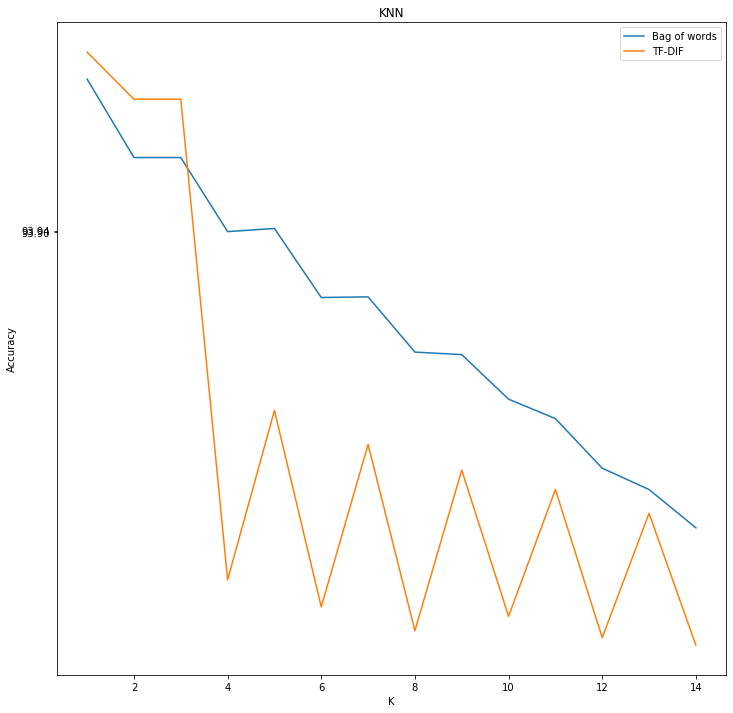

In [23]:
import matplotlib.pyplot as plt
# plt.plot(k, bow)
plt.figure(figsize=(12,12))
plt.title('KNN')
plt.plot(k, bow, label='Bag of words')
plt.plot(k, tfidf, label='TF-DIF')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.yticks([93.9,93.94])
plt.legend()
plt.show()

In [21]:
def test(sentence):
    sentence = pd.DataFrame(sentence.split())
    sentence = sentence.apply(lambda x : [word for word in x if not word in stopWords])

    # print(sentence.head())
    # create a word net lemma
    lemma = nltk.stem.WordNetLemmatizer()
    pos = nltk.corpus.wordnet.VERB
    sentence = sentence.apply(lambda x : [lemma.lemmatize(word, pos) for word in x])

    # remove any punctuation
    sentence = sentence.apply(lambda x : [ remove_pattern(word,'\.') for word in x])

    # rejoin the text again to get a cleaned text
    sent = sentence.apply(lambda x : ' '.join(x))
    sent=bow_vectorizer.transform(sent)
    predi = clf_bow_knn.predict(sent)
    return predi

test("my worst every purchase")

/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])